In [1]:
!nvidia-smi

Wed Apr 28 19:56:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!cat /proc/cpuinfo
!cat /proc/meminfo



# Uma implementação ingênua em Numpy de uma RNN simples.



In [ ]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
                     
successive_outputs = []

for input_t in inputs:
   output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
   successive_outputs.append(output_t)
   state_t = output_t
                     
final_output_sequence = np.concatenate(successive_outputs, axis=0)

print(inputs)

print(final_output_sequence)

[[0.35409575 0.6697206  0.66830218 ... 0.73839543 0.21614189 0.7308437 ]
 [0.81220559 0.87877058 0.59729399 ... 0.59863596 0.1754935  0.80025211]
 [0.3474905  0.11681404 0.55476657 ... 0.68906149 0.53771888 0.69094345]
 ...
 [0.16751975 0.8430198  0.05966152 ... 0.41114606 0.1235863  0.65696038]
 [0.91973907 0.62339623 0.92892319 ... 0.93329695 0.51200436 0.10055417]
 [0.64841545 0.13916731 0.86687565 ... 0.22658327 0.9335958  0.77167486]]
[0.99999743 0.99999988 0.99999929 ... 1.         1.         1.        ]


#Uma implementação simples de LSTM 

Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras
by Jason Brownlee on July 21, 2016 in Deep Learning for Time Series

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
# ---------------------------------------------------

Epoch 1/100
92/92 - 32s - loss: 0.0417
Epoch 2/100
92/92 - 0s - loss: 0.0155
Epoch 3/100
92/92 - 0s - loss: 0.0105
Epoch 4/100
92/92 - 0s - loss: 0.0091
Epoch 5/100
92/92 - 0s - loss: 0.0078
Epoch 6/100
92/92 - 0s - loss: 0.0067
Epoch 7/100
92/92 - 0s - loss: 0.0060
Epoch 8/100
92/92 - 0s - loss: 0.0051
Epoch 9/100
92/92 - 0s - loss: 0.0045
Epoch 10/100
92/92 - 0s - loss: 0.0041
Epoch 11/100
92/92 - 0s - loss: 0.0037
Epoch 12/100
92/92 - 0s - loss: 0.0036
Epoch 13/100
92/92 - 0s - loss: 0.0034
Epoch 14/100
92/92 - 0s - loss: 0.0033
Epoch 15/100
92/92 - 0s - loss: 0.0033
Epoch 16/100
92/92 - 0s - loss: 0.0031
Epoch 17/100
92/92 - 0s - loss: 0.0031
Epoch 18/100
92/92 - 0s - loss: 0.0031
Epoch 19/100
92/92 - 0s - loss: 0.0031
Epoch 20/100
92/92 - 0s - loss: 0.0030
Epoch 21/100
92/92 - 0s - loss: 0.0029
Epoch 22/100
92/92 - 0s - loss: 0.0030
Epoch 23/100
92/92 - 0s - loss: 0.0031
Epoch 24/100
92/92 - 0s - loss: 0.0029
Epoch 25/100
92/92 - 0s - loss: 0.0028
Epoch 26/100
92/92 - 0s - loss: 0

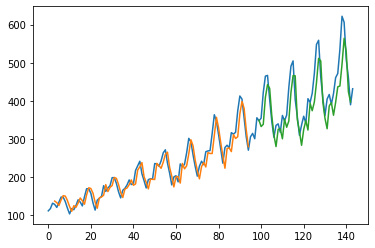

In [2]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import requests

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
req = requests.get("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
url_content = req.content
csv_file = open('airline-passengers.csv', 'wb')
csv_file.write(url_content)
csv_file.close()

dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Previsão vendas de shampoo com LSTM

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """



treinando...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (1, 4)                    96        
_________________________________________________________________
dense_2 (Dense)              (1, 1)                    5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________

Predizendo...
Month=1, Predicted=325.949130, Expected=339.700000
Month=2, Predicted=338.213347, Expected=440.400000
Month=3, Predicted=400.266088, Expected=315.900000
Month=4, Predicted=335.643829, Expected=439.300000
Month=5, Predicted=402.650009, Expected=401.300000
Month=6, Predicted=403.230622, Expected=437.400000
Month=7, Predicted=428.121439, Expected=575.500000
Month=8, Predicted=514.539505, Expected=407.600000
Month=9, Predicted=423.772471, Expected=682.000000
Month=10, Predicted=584.109034

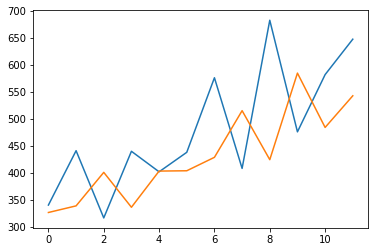

In [4]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
  X, y = train[:, 0:-1], train[:, -1]
  X = X.reshape(X.shape[0], 1, X.shape[1])
  model = Sequential()
  model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  model.summary()

  for i in range(nb_epoch):
    model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
    model.reset_states()
  return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

print('\ntreinando...')
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 30, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)

print('\nPredizendo...')
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-12:])
pyplot.plot(predictions)
pyplot.show()

#O código abaixo usa uma LSTM para gerar texto, no nível de caracteres, usando para treinar letras de musicas sertanejas

In [5]:
import requests

# Corpus sertanejo
req = requests.get("https://raw.githubusercontent.com/alcionepaiva/musicas/main/sertanejo.txt")
url_content = req.content
arquivo = open('sertanejo.txt', 'wb')
arquivo.write(url_content)
arquivo.close()

In [6]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM, GRU
from keras.layers.recurrent import SimpleRNN
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import random
import sys

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, mode='rt', encoding='UTF-8')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# split a loaded document into sentences
def to_lines(doc, percentage):
  lines = doc.strip().split('\n')
  n = int(len(lines)*percentage/100)
  print('Number of lines used:',n)
  return lines[:n-1]

#loading the corpus 
filename = 'sertanejo.txt'
doc = load_doc(filename)

# extract the input as a stream of characters
print("Extracting text from input...")
fin = to_lines(doc,100)
lines = []
for line in fin:
    line = line.strip().lower()
    line = line.encode("ascii", "ignore")
    if len(line) == 0:
        continue
    lines.append(str(line))

text = " ".join(lines)

# creating lookup tables
# Here chars is the number of features in our character "vocabulary"
chars = set([c for c in text])
nb_chars = len(chars)
char2index = dict((c, i) for i, c in enumerate(chars))
index2char = dict((i, c) for i, c in enumerate(chars))

print('Numero de caracteres:',nb_chars)

# create inputs and labels from the text. We do this by stepping
# through the text ${step} character at a time, and extracting a 
# sequence of size ${seqlen} and the next output char. For example,
# assuming an input text "The sky was falling", we would get the 
# following sequence of input_chars and label_chars (first 5 only)
#   The sky wa -> s
#   he sky was ->  
#   e sky was  -> f
#    sky was f -> a
#   sky was fa -> l
print("Creating input and label text...")
SEQLEN = 10
STEP = 1

input_chars = []
label_chars = []
for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i:i + SEQLEN])
    label_chars.append(text[i + SEQLEN])

# vectorize the input and label chars
# Each row of the input is represented by seqlen characters, each 
# represented as a 1-hot encoding of size len(char). There are 
# len(input_chars) such rows, so shape(X) is (len(input_chars),
# seqlen, nb_chars).
# Each row of output is a single character, also represented as a
# dense encoding of size len(char). Hence shape(y) is (len(input_chars),
# nb_chars).
print("Vectorizing input and label text...")
X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)
y = np.zeros((len(input_chars), nb_chars), dtype=np.bool)
for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
    y[i, char2index[label_chars[i]]] = 1
 
print(X.shape)
print('Primeira sequencia:',X[0])
print('Primeiro label:',y[0])

# Build the model. We use a single RNN with a fully connected layer
# to compute the most likely predicted output char
HIDDEN_SIZE = 128
BATCH_SIZE = 128
NUM_ITERATIONS = 10
NUM_EPOCHS_PER_ITERATION = 1
NUM_PREDS_PER_EPOCH = 100

# Construindo o modelo
print('Construindo o Modelo...')
model = Sequential()
#model.add(SimpleRNN(HIDDEN_SIZE, return_sequences=False,  input_shape=(SEQLEN, nb_chars),  unroll=True))
model.add(GRU(128, input_shape=(SEQLEN, nb_chars)))
model.add(Dense(nb_chars))
model.add(Activation('softmax'))
optimizer = RMSprop(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer=optimizer)

# Mostra a estrutura da rede
model.summary()

# We train the model in batches and test output generated at each step
for iteration in range(NUM_ITERATIONS):
    print("=" * 50)
    print("Iteration #: %d" % (iteration))
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)
    
    # testing model
    # randomly choose a row from input_chars, then use it to 
    # generate text from model for next 100 chars
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]
    print("Generating from seed: %s" % (test_chars))
    print(test_chars, end="")
    for i in range(NUM_PREDS_PER_EPOCH):
        Xtest = np.zeros((1, SEQLEN, nb_chars))
        for i, ch in enumerate(test_chars):
            Xtest[0, i, char2index[ch]] = 1
        pred = model.predict(Xtest, verbose=0)[0]
        ypred = index2char[np.argmax(pred)]
        print(ypred, end="")
        # move forward with test_chars + ypred
        test_chars = test_chars[1:] + ypred
    print()

Extracting text from input...
Number of lines used: 30057
Numero de caracteres: 53
Creating input and label text...
Vectorizing input and label text...
(947181, 10, 53)
Primeira sequencia: [[False False False False False False False False False False  True False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False]
 [False False False False False False  True False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  Fal